In [1]:
!pip3 install xgboost

In [2]:
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import io

In [3]:
df= pd.read_csv('./Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

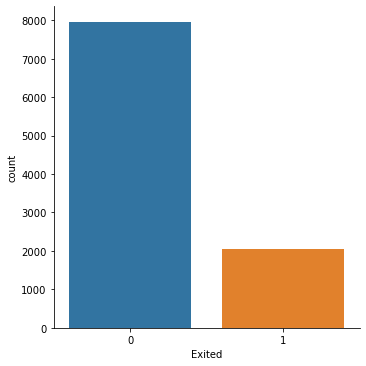

In [8]:
sns.catplot(x='Exited',data=df,kind='count')

In [9]:
cor=df.corr()

<AxesSubplot:>

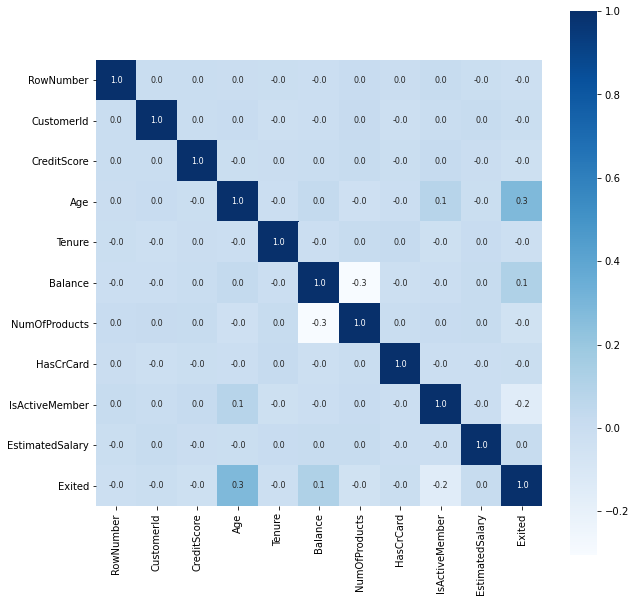

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(cor,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [11]:
df_train_numeric=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

In [12]:
df_cat=df[['Geography','Gender']]

In [13]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [14]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df_cat)

OneHotEncoder(handle_unknown='ignore')

In [15]:
encoder.get_feature_names()

array(['x0_France', 'x0_Germany', 'x0_Spain', 'x1_Female', 'x1_Male'],
      dtype=object)

In [16]:
encoder.transform(df_cat)

<10000x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20000 stored elements in Compressed Sparse Row format>

In [17]:
encoder.transform(df_cat).toarray()

array([[1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [18]:
df_train_encoded= pd.DataFrame(encoder.transform(df_cat).toarray(),columns=encoder.get_feature_names())

In [19]:
df_train_encoded.head()

,x0_France,x0_Germany,x0_Spain,x1_Female,x1_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc= StandardScaler()
df_train_numeric=sc.fit_transform(df_train_numeric)

In [22]:
df_train_numeric=pd.DataFrame(df_train_numeric)

In [23]:
type(df_train_numeric)

pandas.core.frame.DataFrame

In [24]:
df_train_final=pd.concat([df_train_numeric,df_train_encoded],axis=1)

In [25]:
df_train_final.head()

,0,1,2,3,4,5,6,7,x0_France,x0_Germany,x0_Spain,x1_Female,x1_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.0,0.0,0.0,1.0,0.0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0.0,0.0,1.0,1.0,0.0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.0,0.0,0.0,1.0,0.0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,1.0,0.0,0.0,1.0,0.0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0.0,0.0,1.0,1.0,0.0


In [26]:
X=df_train_final
y=df['Exited']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [30]:
model.score(X_train,y_train)*100,model.score(X_test,y_test)*100

(95.6125, 85.05)

In [31]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

Here we use Cross validation 

In [32]:
from sklearn.model_selection import cross_val_score 

In [33]:
cv=cross_val_score(model,X,y,cv=5)

In [34]:
cv

array([0.8615, 0.863 , 0.856 , 0.8625, 0.848 ])

In [35]:
mean_accuracy=sum(cv)/len(cv)
mean_accuracy=mean_accuracy*100
mean_accuracy=round(mean_accuracy,2)
mean_accuracy

85.82

In [36]:
cv.std()

0.00567978872846519

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [38]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1542,   75],
       [ 224,  159]], dtype=int64)

In [39]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1542,75,1617
1,224,159,383
All,1766,234,2000
